In [142]:
import warnings;
warnings.simplefilter('ignore')

In [143]:
#!pip install prophet

In [144]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv('dataset_prop_forecast.csv')
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month'])
df.drop(['Time Date', 'Year', 'Month','Store','Product'], axis = 1, inplace = True)
df.columns = ['y','ds']

In [147]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-01
2,2793.000,2018-01-01
3,2394.000,2018-01-01
4,2660.000,2018-01-01


In [148]:
m = Prophet(interval_width= 0.95, daily_seasonality=True)
model = m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmaxkqou7/ujnfwhgv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmaxkqou7/gaf_0e9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60215', 'data', 'file=/tmp/tmpmaxkqou7/ujnfwhgv.json', 'init=/tmp/tmpmaxkqou7/gaf_0e9y.json', 'output', 'file=/tmp/tmpmaxkqou7/prophet_modelryahxtbi/prophet_model-20240311160935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [149]:
future = m.make_future_dataframe(periods = 100, freq = "D")
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3011.176419,918.937400,4380.047652,3011.176419,3011.176419,-354.875613,-354.875613,-354.875613,353.602121,353.602121,353.602121,-708.477734,-708.477734,-708.477734,0.0,0.0,0.0,2656.300806
1,2018-02-01,3046.197041,1125.036495,4546.162080,3046.197041,3046.197041,-215.815083,-215.815083,-215.815083,353.602121,353.602121,353.602121,-569.417205,-569.417205,-569.417205,0.0,0.0,0.0,2830.381958
2,2018-03-01,3077.828574,833.179967,4223.966809,3077.828574,3077.828574,-522.333364,-522.333364,-522.333364,353.602121,353.602121,353.602121,-875.935485,-875.935485,-875.935485,0.0,0.0,0.0,2555.495210
3,2018-04-01,3112.849189,788.079146,4158.555565,3112.849189,3112.849189,-573.629058,-573.629058,-573.629058,353.602121,353.602121,353.602121,-927.231179,-927.231179,-927.231179,0.0,0.0,0.0,2539.220131
4,2018-05-01,3146.740103,2941.031788,6348.401825,3146.740103,3146.740103,1536.049864,1536.049864,1536.049864,353.602121,353.602121,353.602121,1182.447743,1182.447743,1182.447743,0.0,0.0,0.0,4682.789967


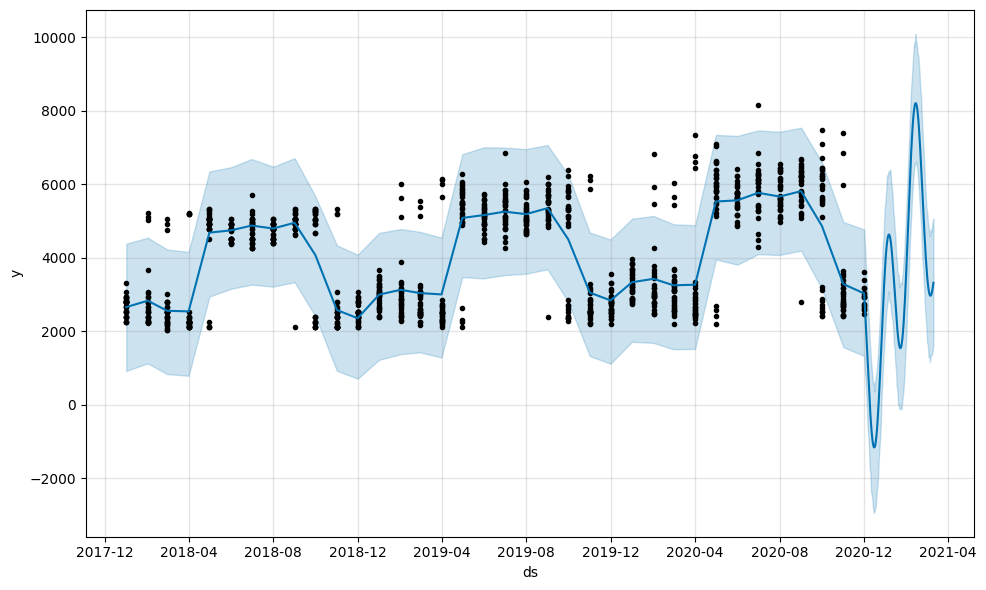

In [150]:
plot1 = m.plot(forecast)

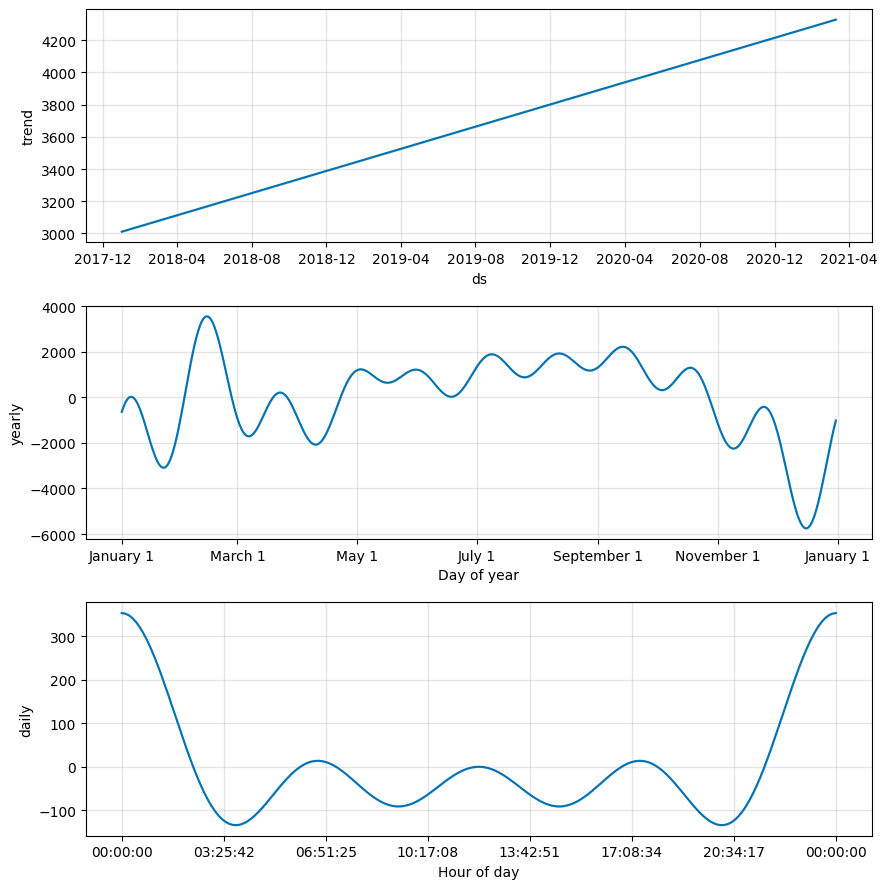

In [151]:
plot2 = m.plot_components(forecast)